LOAD DATASET

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load data
df = pd.read_excel("product cost prediction.csv")

In [2]:
df.head()

,productname,uom,qty,rate,amount,taxableamt,cgstrate,cgstamt,sgstrate,sgstamt,total,originalrate
0,671-LT,Nos,14,155.0,2170.0,2170.0,9.0,195.30,9.0,195.30,2560.6,155.0
1,673-HLA,Nos,1,155.0,155.0,155.0,9.0,13.95,9.0,13.95,182.9,155.0
2,GIALLO GRENE,Nos,3,230.0,690.0,690.0,9.0,62.10,9.0,62.10,814.2,230.0
3,CANYON BROWN,Nos,28,475.0,13300.0,13300.0,9.0,1197.00,9.0,1197.00,15694.0,475.0
4,HERIC GRAFITO-LT,Nos,2,255.0,510.0,510.0,9.0,45.90,9.0,45.90,601.8,255.0


#Exploratory Data Analysis (EDA)#
##Subtask:##
Perform initial Exploratory Data Analysis by displaying basic information (head, info, describe) and generating 2-3 relevant visualizations (e.g., histograms, scatter plots) to understand data distributions and relationships.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   productname   1132 non-null   object 
 1   uom           1132 non-null   object 
 2   qty           1132 non-null   int64  
 3   rate          1132 non-null   float64
 4   amount        1132 non-null   float64
 5   taxableamt    1132 non-null   float64
 6   cgstrate      1132 non-null   float64
 7   cgstamt       1132 non-null   float64
 8   sgstrate      1132 non-null   float64
 9   sgstamt       1132 non-null   float64
 10  total         1132 non-null   float64
 11  originalrate  1132 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 106.3+ KB

------------------------------

Descriptive Statistics:


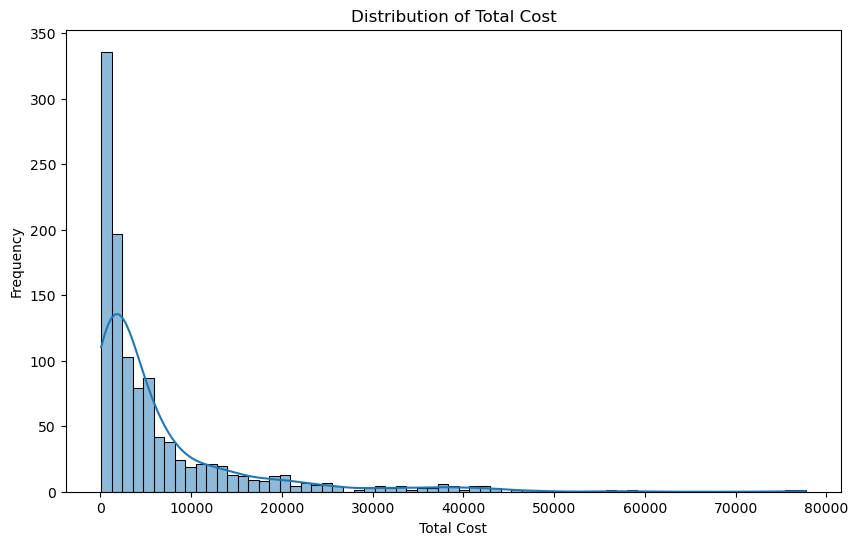

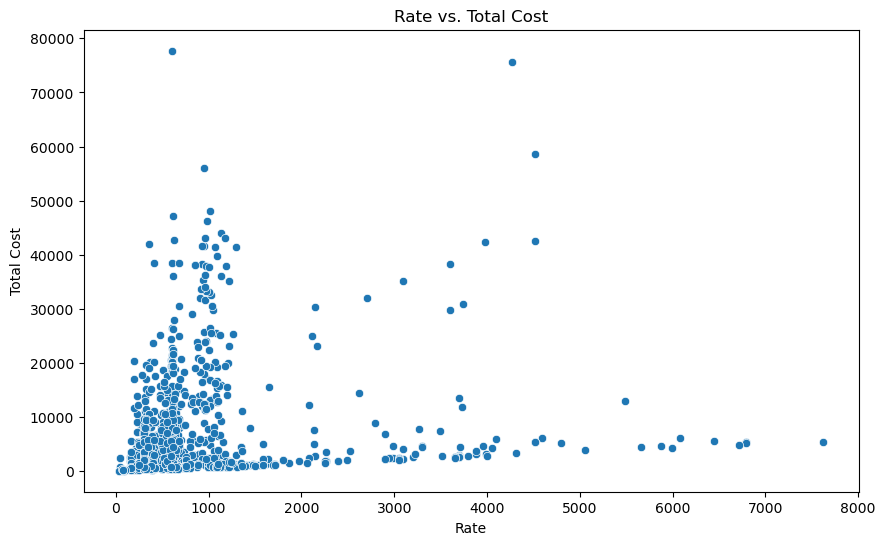

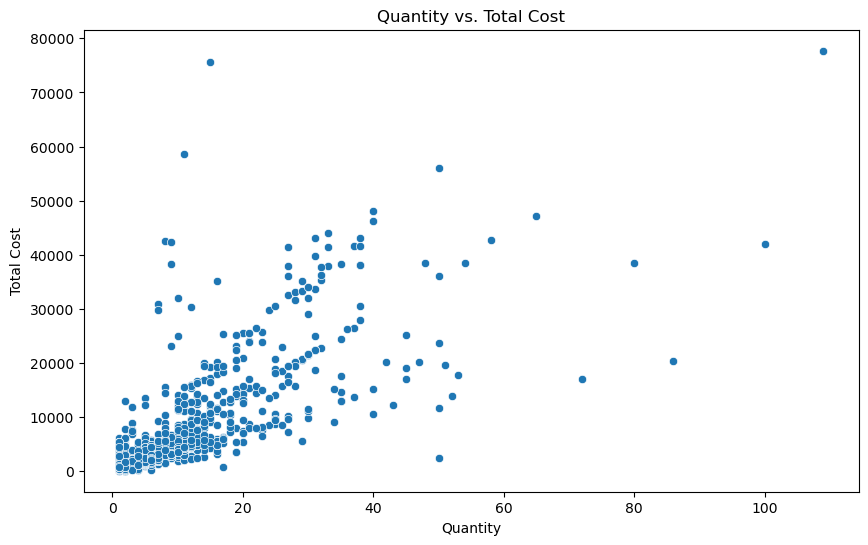

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Display concise summary of the DataFrame
print("DataFrame Info:")
df.info()

print("\n" + "-" * 30 + "\n")

# 2. Generate descriptive statistics for numerical columns
print("Descriptive Statistics:")
df.describe()

# 3. Create a histogram of the 'total' column
plt.figure(figsize=(10, 6))
sns.histplot(df['total'], kde=True)
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()

# 4. Generate a scatter plot to explore the relationship between 'rate' and 'total'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate', y='total', data=df)
plt.title('Rate vs. Total Cost')
plt.xlabel('Rate')
plt.ylabel('Total Cost')
plt.show()

# 5. Create another scatter plot to examine the relationship between 'qty' and 'total'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='qty', y='total', data=df)
plt.title('Quantity vs. Total Cost')
plt.xlabel('Quantity')
plt.ylabel('Total Cost')
plt.show()

In [5]:
print(df.describe().to_string())

               qty         rate        amount    taxableamt     cgstrate      cgstamt     sgstrate      sgstamt         total  originalrate
count  1132.000000  1132.000000   1132.000000   1132.000000  1132.000000  1132.000000  1132.000000  1132.000000   1132.000000   1132.000000
mean      8.898410   842.187548   5658.961670   5406.067598     9.045495   483.558579     9.045495   483.558579   6370.710329    864.544643
std      11.390866   921.384641   7936.479524   7872.115634     0.868399   705.039318     0.868399   705.039318   9260.075430    962.922079
min       1.000000    33.000000     66.000000     66.000000     0.000000     0.000000     0.000000     0.000000     77.880000     33.000000
25%       1.000000   325.000000   1147.880750    920.000000     9.000000    82.750000     9.000000    82.750000   1085.600000    333.750000
50%       5.000000   602.000000   2520.000000   2288.779650     9.000000   205.520350     9.000000   205.520350   2710.460000    605.000000
75%      11.000000  

Data Preprocessing and Feature Engineering

Subtask:
Clean the data by handling missing values (e.g., imputation or removal) and performing any necessary data type conversions. If required, create new features from existing ones to improve model performance.

Reasoning: The first step in data preprocessing is to ensure data integrity by identifying and removing any duplicate rows. I will print the number of rows before and after removing duplicates to show the effect of this operation.

In [6]:
print(f"Number of rows before removing duplicates: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows before removing duplicates: 1132
Number of rows after removing duplicates: 1079


Reasoning: To understand the cardinality of categorical features and assess potential encoding strategies, I will examine the unique values and their counts for 'productname' and 'uom' columns

In [7]:
print("Unique values and counts for 'productname':")
print(df['productname'].value_counts())
print("\n" + "-" * 30 + "\n")
print("Unique values and counts for 'uom':")
print(df['uom'].value_counts())

Unique values and counts for 'productname':
productname
MYK TIL;E ADHESIVE 305                                                                                                                            42
MYK TILE ADHESIVE 290                                                                                                                             27
HERICAN TUSK                                                                                                                                      24
SPERENZA WHITE PLUS                                                                                                                               20
SIFON BAINCO                                                                                                                                      20
                                                                                                                                                  ..
FF02014 WALL MIXER 3IN 1 SYSTEM WITH PROVISION FOR

Reasoning: To verify the relationship between 'amount', 'rate', and 'qty', I will calculate the difference between 'amount' and the product of 'rate' and 'qty'. This will reveal if 'amount' is a simple derivation, which could indicate redundancy.

In [8]:
df['amount_calc_diff'] = df['amount'] - (df['rate'] * df['qty'])
print("Descriptive statistics for 'amount_calc_diff':")
print(df['amount_calc_diff'].describe().to_string())
print("\nNumber of rows where 'amount_calc_diff' is not zero:", len(df[df['amount_calc_diff'] != 0]))

Descriptive statistics for 'amount_calc_diff':
count    1079.000000
mean       -0.887339
std        29.147469
min      -957.440000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.006000

Number of rows where 'amount_calc_diff' is not zero: 68





Reasoning: To analyze the relationship between 'taxableamt' and 'amount' for redundancy or direct correlation, I will calculate their difference and display its descriptive statistics, along with the count of non-zero differences.



In [9]:
df['taxable_amount_diff'] = df['taxableamt'] - df['amount']
print("Descriptive statistics for 'taxable_amount_diff':")
print(df['taxable_amount_diff'].describe().to_string())
print("\nNumber of rows where 'taxable_amount_diff' is not zero:", len(df[df['taxable_amount_diff'] != 0]))

Descriptive statistics for 'taxable_amount_diff':
count     1079.000000
mean      -259.654068
std        938.391581
min     -19808.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000100

Number of rows where 'taxable_amount_diff' is not zero: 262


Reasoning: To investigate the derivation of 'cgstamt' and 'sgstamt', I will calculate their values based on 'taxableamt' and their respective rates ('cgstrate', 'sgstrate') and then compute the difference with the existing 'cgstamt' and 'sgstamt' columns. This will indicate if these columns are directly calculable and potentially redundant.

In [10]:
df['cgst_calculated'] = df['taxableamt'] * (df['cgstrate'] / 100)
df['sgst_calculated'] = df['taxableamt'] * (df['sgstrate'] / 100)

df['cgst_amount_diff'] = df['cgstamt'] - df['cgst_calculated']
df['sgst_amount_diff'] = df['sgstamt'] - df['sgst_calculated']

print("Descriptive statistics for 'cgst_amount_diff':")
print(df['cgst_amount_diff'].describe().to_string())
print("\nNumber of rows where 'cgst_amount_diff' is not zero:", len(df[df['cgst_amount_diff'] != 0]))

print("\n" + "-" * 30 + "\n")

print("Descriptive statistics for 'sgst_amount_diff':")
print(df['sgst_amount_diff'].describe().to_string())
print("\nNumber of rows where 'sgst_amount_diff' is not zero:", len(df[df['sgst_amount_diff'] != 0]))

Descriptive statistics for 'cgst_amount_diff':
count    1079.000000
mean       -0.579034
std        22.480894
min      -483.735000
25%         0.000000
50%         0.000000
75%         0.000000
max       372.762000

Number of rows where 'cgst_amount_diff' is not zero: 388

------------------------------

Descriptive statistics for 'sgst_amount_diff':
count    1079.000000
mean       -0.579034
std        22.480894
min      -483.735000
25%         0.000000
50%         0.000000
75%         0.000000
max       372.762000

Number of rows where 'sgst_amount_diff' is not zero: 388


Reasoning: Based on the previous analyses, several temporary columns (amount_calc_diff, taxable_amount_diff, cgst_calculated, sgst_calculated, cgst_amount_diff, sgst_amount_diff) were created to assess redundancy and data derivation. These columns are no longer needed and should be dropped. Additionally, to avoid data leakage when predicting the 'total' cost, columns like 'amount', 'taxableamt', 'cgstamt', and 'sgstamt' which are direct components of the 'total' should be removed, as using them would make the prediction trivial. The 'originalrate' column will be examined for its redundancy with 'rate'.

In [11]:
print(f"Number of rows where 'originalrate' != 'rate': {len(df[df['originalrate'] != df['rate']])}")

# Drop temporary calculation columns
df.drop(columns=['amount_calc_diff', 'taxable_amount_diff', 'cgst_calculated', 'sgst_calculated', 'cgst_amount_diff', 'sgst_amount_diff'], inplace=True)

# Drop columns that are direct components of 'total' to avoid data leakage
# 'amount', 'taxableamt', 'cgstamt', 'sgstamt' are direct calculations or near-direct components of 'total'
df.drop(columns=['amount', 'taxableamt', 'cgstamt', 'sgstamt'], inplace=True)

# Check if 'originalrate' is identical to 'rate'. If it is, drop 'originalrate'.
# From the check above, if 0, then drop 'originalrate'. If not, keep it.
if len(df[df['originalrate'] != df['rate']]) == 0:
    df.drop(columns=['originalrate'], inplace=True)
    print("Dropped 'originalrate' as it was identical to 'rate'.")
else:
    print("Keeping 'originalrate' as it differs from 'rate' in some rows.")

print("Remaining columns after dropping:")
print(df.columns)

Number of rows where 'originalrate' != 'rate': 128
Keeping 'originalrate' as it differs from 'rate' in some rows.
Remaining columns after dropping:
Index(['productname', 'uom', 'qty', 'rate', 'cgstrate', 'sgstrate', 'total',
       'originalrate'],
      dtype='object')


Define Target and Features
Subtask:
Identify and separate the target variable (dependent variable) from the feature variables (independent variables) in the dataset.

Reasoning: To identify and separate the target variable from the feature variables, I will assign the 'total' column to 'y' and create 'X' by dropping 'total' from the DataFrame. This directly addresses the instructions provided.

In [12]:
y = df['total']
X = df.drop(columns=['total'])

print("First 5 rows of features (X):")
print(X.head())
print("\nFirst 5 rows of target (y):")
print(y.head())

First 5 rows of features (X):
        productname  uom  qty   rate  cgstrate  sgstrate  originalrate
0            671-LT  Nos   14  155.0       9.0       9.0         155.0
1           673-HLA  Nos    1  155.0       9.0       9.0         155.0
2      GIALLO GRENE  Nos    3  230.0       9.0       9.0         230.0
3      CANYON BROWN  Nos   28  475.0       9.0       9.0         475.0
4  HERIC GRAFITO-LT  Nos    2  255.0       9.0       9.0         255.0

First 5 rows of target (y):
0     2560.6
1      182.9
2      814.2
3    15694.0
4      601.8
Name: total, dtype: float64


Train Machine Learning Model
Subtask:
Split the preprocessed data into training and testing sets. Select and train an appropriate machine learning regression model for product cost prediction.

Reasoning: To standardize the 'uom' column, I will first convert all its values to lowercase to ensure consistency. Then, I will address specific inconsistencies by replacing 'bag' with 'nos' and handling the anomalous entry '2' by also mapping it to 'nos' for better categorization.



In [13]:
X['uom'] = X['uom'].str.lower()
X['uom'] = X['uom'].replace({'bag': 'nos', '2': 'nos'})

print("Unique values and counts for 'uom' after standardization:")
print(X['uom'].value_counts())

Unique values and counts for 'uom' after standardization:
uom
nos    728
box    350
Name: count, dtype: int64


Reasoning: To prepare the categorical features 'productname' and 'uom' for machine learning, I will apply one-hot encoding using pd.get_dummies(). This converts them into numerical representations suitable for model training.

In [14]:
X = pd.get_dummies(X, columns=['productname', 'uom'], drop_first=True)

print("First 5 rows of features (X) after one-hot encoding:")
print(X.head())

First 5 rows of features (X) after one-hot encoding:
   qty   rate  cgstrate  sgstrate  originalrate  productname_1008  \
0   14  155.0       9.0       9.0         155.0             False   
1    1  155.0       9.0       9.0         155.0             False   
2    3  230.0       9.0       9.0         230.0             False   
3   28  475.0       9.0       9.0         475.0             False   
4    2  255.0       9.0       9.0         255.0             False   

   productname_12011  productname_12036  productname_12057  \
0              False              False              False   
1              False              False              False   
2              False              False              False   
3              False              False              False   
4              False              False              False   

   productname_1008-GVT  ...  productname_WINSET GR-LT  \
0                 False  ...                     False   
1                 False  ...               

Reasoning: To prepare the data for model training, I will split the features X and target y into training and testing sets. Then, I will initialize a RandomForestRegressor model and train it using the training data, as specified in the instructions.



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

X_train shape: (863, 387)
X_test shape: (216, 387)
y_train shape: (863,)
y_test shape: (216,)
Model training complete.


Evaluate Model Performance
Subtask:
Evaluate the trained model's performance on the test set using relevant regression metrics such as R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE).

**Reasoning**:
To evaluate the trained model, I will first use the model to predict the target values for the test dataset (`X_test`). Then, I will calculate and display the R-squared score, Mean Absolute Error (MAE), and Mean Squared Error (MSE) using `y_test` and the generated predictions.



In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

R-squared: 0.9700
Mean Absolute Error (MAE): 532.3702
Mean Squared Error (MSE): 1958910.6432


## Save Model

### Subtask:
Save the trained machine learning model using the 'joblib' library, allowing for easy loading and deployment later.

**Reasoning**:
To save the trained machine learning model, I will import the `joblib` library and then use `joblib.dump()` to serialize the `model` object to a file named 'random_forest_model.joblib'.

import joblib

# Save the trained model to a file
joblib.dump(model, 'random_forest_model.joblib')

print("Model saved successfully as 'random_forest_model.joblib'")

## Create Gradio Interface

### Subtask:
Develop a simple Gradio interface that allows users to input feature values and receive predictions from the saved machine learning model.

**Reasoning**:
To create the Gradio interface, I need to first import the necessary libraries (`gradio` and `joblib`), load the previously saved model, retrieve the column names used during model training, and prepare the unique values for categorical inputs. Then, I will define a prediction function that preprocesses user inputs to match the model's expected input format, and finally, set up the Gradio interface components and launch it.

In [17]:
!pip install gradio


In [ ]:
import gradio as gr
import joblib
import pandas as pd

# --------------------------
#  Load your trained model
# --------------------------
model = joblib.load("random_forest_model.joblib")

# --------------------------
#  Define model columns manually
# Replace these with the exact columns used in training
# Include one-hot encoded columns for productname and uom
# Example:
model_columns = [
    'qty', 'rate', 'cgstrate', 'sgstrate', 'originalrate',
    'productname_ProductB', 'productname_ProductC',  # add all trained products except first (for drop_first)
    'uom_box'  # add all uom columns except the first
]

# --------------------------
#  Define dropdown values
# --------------------------
unique_productnames = ['ProductA', 'ProductB', 'ProductC']  # replace with your actual products
unique_uom = ['nos', 'box']  # replace with your actual UOMs

# --------------------------
#  Prediction function
# --------------------------
def predict_cost(qty, rate, cgstrate, sgstrate, originalrate, productname_input, uom_input):
    # Create input dataframe
    input_data = pd.DataFrame([[qty, rate, cgstrate, sgstrate, originalrate, productname_input, uom_input]],
                              columns=['qty', 'rate', 'cgstrate', 'sgstrate', 'originalrate', 'productname', 'uom'])

    # One-hot encode productname and uom
    input_encoded = pd.get_dummies(input_data, columns=['productname', 'uom'], drop_first=True)

    # Align input with model columns
    final_input = pd.DataFrame(columns=model_columns, index=range(len(input_encoded))).fillna(0)
    for col in input_encoded.columns:
        if col in final_input.columns:
            final_input[col] = input_encoded[col]

    # Make prediction
    prediction = model.predict(final_input)[0]
    return f"Predicted Total Cost: {prediction:.2f}"

# --------------------------
#  Gradio interface
# --------------------------
inputs = [
    gr.Number(label="Quantity (qty)", value=1),
    gr.Number(label="Rate", value=100.0),
    gr.Number(label="CGST Rate (cgstrate)", value=9.0),
    gr.Number(label="SGST Rate (sgstrate)", value=9.0),
    gr.Number(label="Original Rate (originalrate)", value=100.0),
    gr.Dropdown(unique_productnames, label="Product Name (productname)"),
    gr.Dropdown(unique_uom, label="Unit of Measurement (uom)")
]

interface = gr.Interface(
    fn=predict_cost,
    inputs=inputs,
    outputs="text",
    title="Product Cost Prediction",
    description="Enter product details to predict the total cost."
)

# Launch the app
interface.launch(debug=True, share=True)


In [ ]:
import gradio as gr
import joblib
import pandas as pd
import socket

model = joblib.load("random_forest_model.joblib")

model_columns = [
    "qty",
    "rate",
    "cgstrate",
    "sgstrate",
    "originalrate",
    "productname_ProductB",
    "productname_ProductC",
    "uom_box"
]

product_names = ["ProductA", "ProductB", "ProductC"]
uoms = ["nos", "box"]

def predict_cost(qty, rate, cgstrate, sgstrate, originalrate, productname, uom):
    df = pd.DataFrame(
        [[qty, rate, cgstrate, sgstrate, originalrate, productname, uom]],
        columns=["qty", "rate", "cgstrate", "sgstrate", "originalrate", "productname", "uom"]
    )

    df_encoded = pd.get_dummies(df, columns=["productname", "uom"], drop_first=True)

    final_df = pd.DataFrame(0, index=[0], columns=model_columns)
    for col in df_encoded.columns:
        if col in final_df.columns:
            final_df[col] = df_encoded[col]

    result = model.predict(final_df)[0]
    return f"Predicted Total Cost: {result:.2f}"

def get_free_port():
    s = socket.socket()
    s.bind(('', 0))
    port = s.getsockname()[1]
    s.close()
    return port

with gr.Blocks() as app:
    gr.Markdown("# Product Cost Prediction")

    qty = gr.Number(value=1, label="Quantity")
    rate = gr.Number(value=100, label="Rate")
    cgst = gr.Number(value=9, label="CGST Rate")
    sgst = gr.Number(value=9, label="SGST Rate")
    original = gr.Number(value=100, label="Original Rate")
    product = gr.Dropdown(product_names, label="Product Name")
    uom = gr.Dropdown(uoms, label="UOM")

    output = gr.Textbox(label="Result")

    btn = gr.Button("Predict")
    btn.click(
        predict_cost,
        inputs=[qty, rate, cgst, sgst, original, product, uom],
        outputs=output
    )

app.launch(
    server_port=get_free_port(),
    prevent_thread_lock=True,
    share=False
)


In [ ]:
import gradio as gr
import joblib
import pandas as pd

# --------------------------
# 1️⃣ Load your trained model
# --------------------------
model = joblib.load("random_forest_model.joblib")

# --------------------------
# 2️⃣ Define model columns manually
# Replace these with the exact columns used in training
# Include one-hot encoded columns for productname and uom
# Example:
model_columns = [
    'qty', 'rate', 'cgstrate', 'sgstrate', 'originalrate',
    'productname_ProductB', 'productname_ProductC',  # add all trained products except first (for drop_first)
    'uom_box'  # add all uom columns except the first
]

# --------------------------
# 3️⃣ Define dropdown values
# --------------------------
unique_productnames = ['ProductA', 'ProductB', 'ProductC']  # replace with your actual products
unique_uom = ['nos', 'box']  # replace with your actual UOMs

# --------------------------
# 4️⃣ Prediction function
# --------------------------
def predict_cost(qty, rate, cgstrate, sgstrate, originalrate, productname_input, uom_input):
    # Create input dataframe
    input_data = pd.DataFrame([[qty, rate, cgstrate, sgstrate, originalrate, productname_input, uom_input]],
                              columns=['qty', 'rate', 'cgstrate', 'sgstrate', 'originalrate', 'productname', 'uom'])

    # One-hot encode productname and uom
    input_encoded = pd.get_dummies(input_data, columns=['productname', 'uom'], drop_first=True)

    # Align input with model columns
    final_input = pd.DataFrame(columns=model_columns, index=range(len(input_encoded))).fillna(0)
    for col in input_encoded.columns:
        if col in final_input.columns:
            final_input[col] = input_encoded[col]

    # Make prediction
    prediction = model.predict(final_input)[0]
    return f"Predicted Total Cost: {prediction:.2f}"

# --------------------------
# 5️⃣ Gradio interface
# --------------------------
inputs = [
    gr.Number(label="Quantity (qty)", value=1),
    gr.Number(label="Rate", value=100.0),
    gr.Number(label="CGST Rate (cgstrate)", value=9.0),
    gr.Number(label="SGST Rate (sgstrate)", value=9.0),
    gr.Number(label="Original Rate (originalrate)", value=100.0),
    gr.Dropdown(unique_productnames, label="Product Name (productname)"),
    gr.Dropdown(unique_uom, label="Unit of Measurement (uom)")
]

interface = gr.Interface(
    fn=predict_cost,
    inputs=inputs,
    outputs="text",
    title="Product Cost Prediction",
    description="Enter product details to predict the total cost."
)

# Launch the app
interface.launch(debug=True, share=True)
